# <center><font style="color:rgb(100,109,254)"> Histograms</font><center>

A histogram is a representation of the distribution of numerical data. unlike bar charts it represents only a single variable, on the x-axis is the distribution of data, sorted in bins and on the y-axis is the frequency of occurrence.

See an example below where students are categorized according to the marks they received. On x-axis are the marks and on y-axis is the number of students.

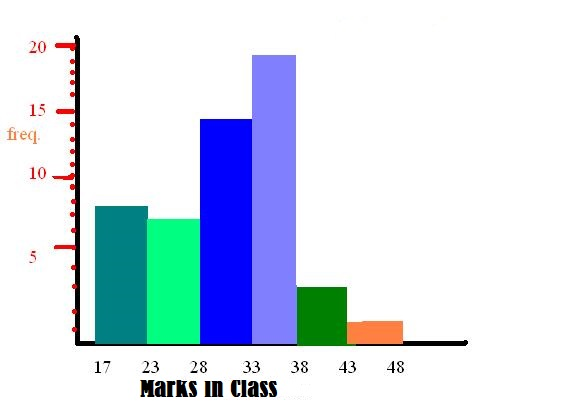

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# <font style="color:rgb(134,19,348)">Histograms Of Image</font>


Now what is an histogram of an image ? You can consider it as a graph or a plot, which gives you an overall idea about the intensity distribution of an image. It is a plot with pixel values (ranging from 0 to 255, not always) in X-axis and corresponding number of pixels in the image on Y-axis.

It is just another way of understanding the image. By looking at the histogram of an image, you get intuition about contrast, brightness, intensity distribution etc of that image. Almost all image processing tools today, provides features on histogram. 

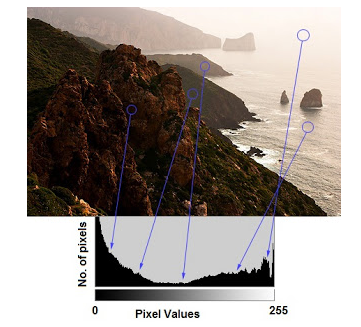

You can see the image and its histogram. (Remember, this histogram is drawn for grayscale image, not color image). Left region of histogram shows the amount of darker pixels in image and right region shows the amount of brighter pixels. From the histogram, you can see dark region is more than brighter region, and amount of midtones (pixel values in mid-range, say around 127) are very less.

###  <font style="color:rgb(134,19,348)">Find Histogram </font>
    Now we have an idea on what is histogram, we can look into how to find this. OpenCV, Numpy and Matplotlib all` come with in-built function for this. Before using those functions, we need to understand some terminologies related with histograms.

`BINS` :The above histogram shows the number of pixels for every pixel value, ie from 0 to 255. ie you need 256 values to show the above histogram. But consider, what if you need not find the number of pixels for all pixel values separately, but number of pixels in a interval of pixel values? say for example, you need to find the number of pixels lying between 0 to 15, then 16 to 31, ..., 240 to 255. You will need only 16 values to represent the histogram. And that is what is shown in example given in OpenCV Tutorials on histograms.

So what you do is simply split the whole histogram to 16 sub-parts and value of each sub-part is the sum of all pixel count in it. This each sub-part is called "BIN". In first case, number of bins were 256 (one for each pixel) while in second case, it is only 16. BINS is represented by the term histSize in OpenCV docs.

`DIMS` : It is the number of parameters for which we collect the data. In the above case, we collect data regarding only one thing, intensity value. so it would be 1 for grayscale images.

`RANGE` : It is the range of intensity values you want to measure. Normally, it is [0,256], i.e. all intensity values.

## <font style="color:rgb(134,19,348)">Histogram Calculation in OpenCV</font>
So now we use `cv.calcHist()` function to find the histogram. Let's familiarize with the function and its parameters :

[```cv2.calcHist(images, channels, mask, histSize, ranges)```](https://docs.opencv.org/4.2.0/d6/dc7/group__imgproc__hist.html#ga4b2b5fd75503ff9e6844cc4dcdaed35d)

- `images` : it is the source image of type uint8 or float32. it should be given in square brackets, ie, "[img]".

- `channels` : it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.

- `mask` : mask image. To find histogram of full image, it is given as "None". But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)

- `histSize` : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].

- `ranges` : this is our RANGE. Normally, it is [0,256].

So let's start with a sample image. Simply load an image in grayscale mode and find its full histogram.

We will be taking the histogram of the below picture:

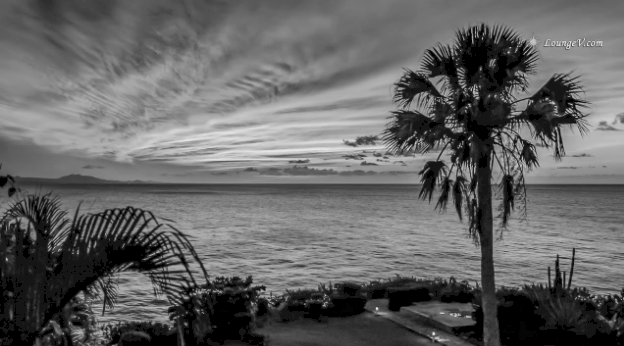

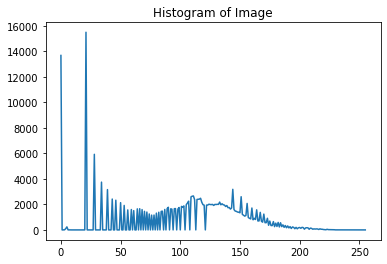

In [2]:
img = cv2.imread('media/M4/hists.PNG',0)

# since we are reading in grayscale we are only going to get the histogram of the first channel
hist = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist);plt.title("Histogram of Image");

This hist is a 256x1 array,  and each value corresponds to number of pixels in that image with its corresponding pixel value.

In [3]:
np.shape(hist)

(256, 1)

##  <font style="color:rgb(134,19,348)">Plotting Histograms Using Matplotlib</font>
Matplotlib also comes with a histogram plotting function : `matplotlib.pyplot.hist()`, the params here are pretty similar to OpenCV params. You either pass in the flattened image, you can do that with `img.flatten()` or with `img.ravel()`, then you pass in the bins and then the range.

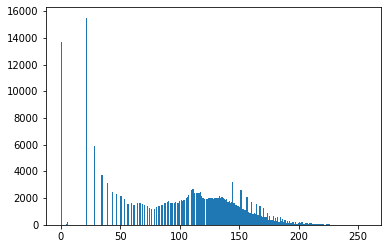

In [4]:
plt.hist(img.ravel(),256,[0,256]);  # you can directly plot histograms using matplot functions
plt.show()

#  <font style="color:rgb(134,19,348)">Histogram of Color Images</font>
Lets see how we can plot Histograms of All three channels of a Color Image. For this we just need to plot histograms of individual channels in the same plot. 

For this we will use the following Image.

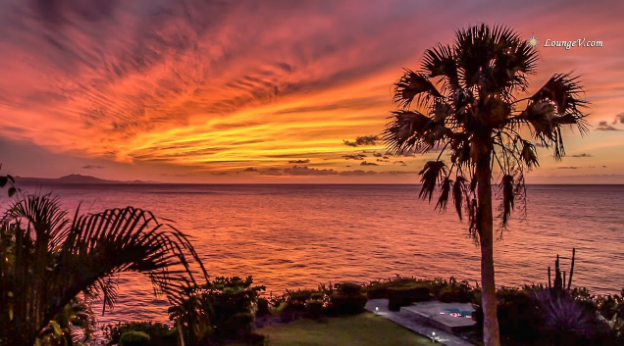

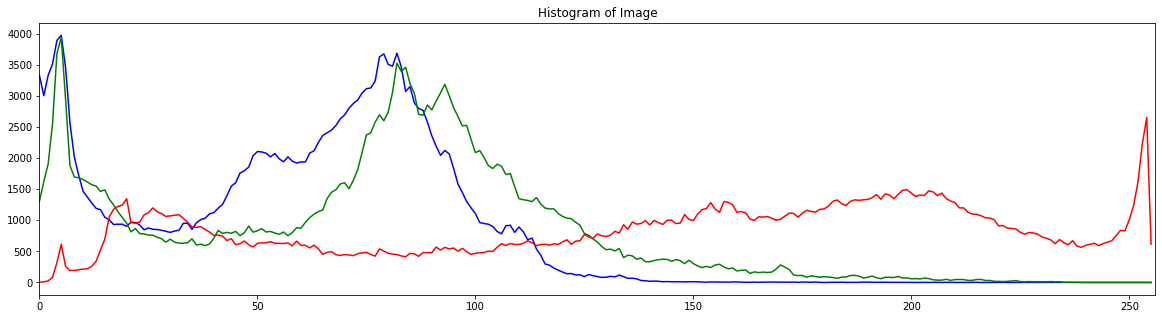

In [5]:
img = cv2.imread('media/M4/hists.PNG',1)

plt.figure(figsize=[20,5])
color = ('b','g','r') 

# so now we will over the above tuple and draw each channel
for i,col in enumerate(color):
    hist = cv2.calcHist([img],[i],None,[256],[0,256])     
    plt.plot(hist, color = col);plt.title("Histogram of Image")        
    plt.xlim([0,256]);  #limit on x-axis 0 to 256
plt.show()

**Note:** Histogram is a pretty useful feature for classical image recognition pipelines, but it should be noted that histograms do not encode spatial information so two different images if they have the same color distribution can have the  same histogram.

###  <font style="color:rgb(34,169,134)"> Assignment: Minimilistic Image Classifier with Histograms </font>
**You Can actually create a very basic Image classifier by comparing the histograms of images, you can look at [this Article](https://www.pyimagesearch.com/2014/07/14/3-ways-compare-histograms-using-opencv-python/) to  see various comparasion functions and then using this, build a basic image classifier. If you're having a hard time then look up online for more help as there are many blogs on this topic**

In [ ]:
### ADD CODE HERE

